In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
 
# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# to make this notebook's output stable across runs
np.random.seed(42)
 
# To plot pretty figures
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Reading The Data & PreProcess

In [3]:
PATH_TO_DATA = r"C:\Users\Reza\Iris.csv"
df = pd.read_csv(PATH_TO_DATA)
df
#Data=df.values

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
cat_columns = df.select_dtypes(['O']).columns
for cat in cat_columns: 
  df[cat] = df[cat].astype('category')
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
Data=df.values
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Plotting Part A


Text(0.5, 0, 'Petal_Length')

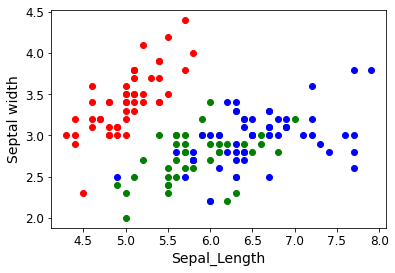

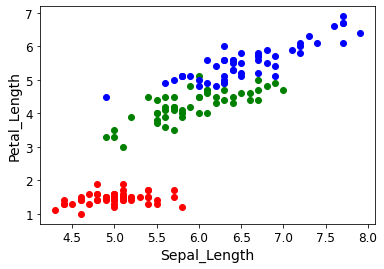

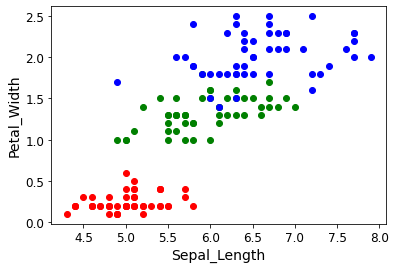

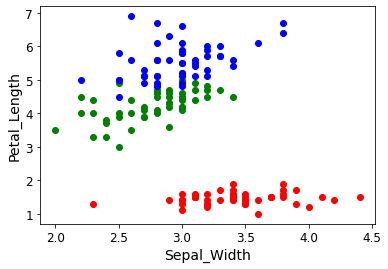

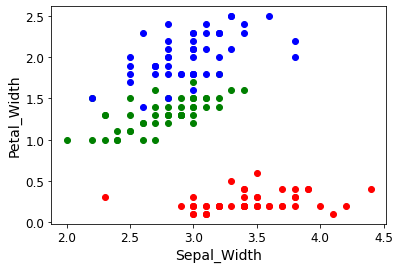

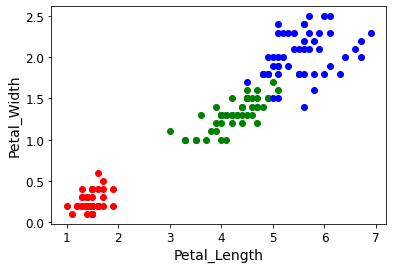

In [5]:
x0=Data[:,0] #Sepal_Length
x1=Data[:,1] #Sepal_Width
x2=Data[:,2] #Petal_Length
x3=Data[:,3] #Petal_Width
Class=Data[:,-1] #Class Iris sentosa :0 ,Iris-versicolor:1 , Iris-virginica:2 

#first figure
plt.figure()
for i in range(len(x0)):
    if (Class[i]==0):
        plt.plot(x0[i],x1[i],'ro') 
    elif (Class[i]==1):
        plt.plot(x0[i],x1[i],'go') 
    elif (Class[i]==2):
        plt.plot(x0[i],x1[i],'bo')
  
plt.ylabel('Septal width')
plt.xlabel('Sepal_Length')
# plt.grid()  

#second figure
plt.figure()
for i in range(len(x0)):
    if (Class[i]==0):
        plt.plot(x0[i],x2[i],'ro') 
    elif (Class[i]==1):
        plt.plot(x0[i],x2[i],'go') 
    elif (Class[i]==2):
        plt.plot(x0[i],x2[i],'bo')
  
plt.ylabel('Petal_Length')
plt.xlabel('Sepal_Length')
# plt.grid()  

#third figure
plt.figure()
for i in range(len(x0)):
    if (Class[i]==0):
        plt.plot(x0[i],x3[i],'ro') 
    elif (Class[i]==1):
        plt.plot(x0[i],x3[i],'go') 
    elif (Class[i]==2):
        plt.plot(x0[i],x3[i],'bo')
  
plt.ylabel('Petal_Width')
plt.xlabel('Sepal_Length')


#4th figure
plt.figure()
for i in range(len(x0)):
    if (Class[i]==0):
        plt.plot(x1[i],x2[i],'ro') 
    elif (Class[i]==1):
        plt.plot(x1[i],x2[i],'go') 
    elif (Class[i]==2):
        plt.plot(x1[i],x2[i],'bo')
  
plt.ylabel('Petal_Length')
plt.xlabel('Sepal_Width')

#5th figure
plt.figure()
for i in range(len(x0)):
    if (Class[i]==0):
        plt.plot(x1[i],x3[i],'ro') 
    elif (Class[i]==1):
        plt.plot(x1[i],x3[i],'go') 
    elif (Class[i]==2):
        plt.plot(x1[i],x3[i],'bo')
  
plt.ylabel('Petal_Width')
plt.xlabel('Sepal_Width')

#5th figure
plt.figure()
for i in range(len(x0)):
    if (Class[i]==0):
        plt.plot(x2[i],x3[i],'ro') 
    elif (Class[i]==1):
        plt.plot(x2[i],x3[i],'go') 
    elif (Class[i]==2):
        plt.plot(x2[i],x3[i],'bo')
  
plt.ylabel('Petal_Width')
plt.xlabel('Petal_Length')


# Part B : Implemention


In [6]:
# Shuffle your dataset 
shuffle_df = df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.75 * len(df))   # 75 percent Train and 25% test

# Split your dataset 
train_set = shuffle_df[:train_size].values
test_set = shuffle_df[train_size:].values

In [7]:
b=train_set.shape[0]
c=test_set.shape[0]

In [8]:
mean_class0=np.zeros((4,1))
mean_class1=np.zeros((4,1))
mean_class2=np.zeros((4,1))
counter0=0
counter1=0
counter2=0
features=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

for i in range (b):
    if (train_set[i,-1]==0):
        counter0+=1
        mean_class0[:,0]=train_set[i,:4]+mean_class0[:,0]
    elif (train_set[i,-1]==1):
        counter1+=1
        mean_class1[:,0]=train_set[i,:4]+mean_class1[:,0]    
    elif (train_set[i,-1]==2):
        counter2+=1
        mean_class2[:,0]=train_set[i,:4]+mean_class2[:,0] 
mean_class0=(mean_class0/counter0).reshape((1,4))
mean_class1=(mean_class1/counter1).reshape((1,4))
mean_class2=(mean_class2/counter2).reshape((1,4))


In [9]:
from numpy import linalg as LA
class_pred=np.zeros((c,1))
for j in range (c):
    error0=LA.norm(test_set[j,:-1]-mean_class0)
    error1=LA.norm(test_set[j,:-1]-mean_class1)
    error2=LA.norm(test_set[j,:-1]-mean_class2)
    if (min(error0,error1,error2)==error0):
        class_pred[j]=0
    elif (min(error0,error1,error2)==error1):
        class_pred[j]=1    
    elif (min(error0,error1,error2)==error2):
        class_pred[j]=2 
        


xx=class_pred[:,0]-test_set[:,-1]  
class_names=['setosa', 'versicolor', 'virginica']
confusion_mtx=np.zeros((3,3))


for j in range (c):
    k=int(class_pred[j,0])
    if (xx[j]==0):
        confusion_mtx[k,k]+=1
    elif (xx[j]==1):
        confusion_mtx[k,k-1]+=1
    elif (xx[j]==2):
        confusion_mtx[k,k+2]+=1
    elif (xx[j]==-1):
        confusion_mtx[k,k+1]+=1
    elif (xx[j]==-2):
        confusion_mtx[k,k+2]+=1

accuracy=(confusion_mtx[0,0]+confusion_mtx[1,1]+confusion_mtx[2,2])/c
print("Acurracy is :",accuracy)
print("Confusion Matrix\n",confusion_mtx)
def f1_score(R,P):
    f1_scoree=2*R*P/(R+P)
    return f1_scoree
    
R0=confusion_mtx[0,0]/(confusion_mtx.sum(axis=1)[0])
P0=confusion_mtx[0,0]/(confusion_mtx.sum(axis=0)[0])
f1_score0=f1_score(R0,P0)

R1=confusion_mtx[1,1]/(confusion_mtx.sum(axis=1)[1])
P1=confusion_mtx[1,1]/(confusion_mtx.sum(axis=0)[1])
f1_score1=f1_score(R1,P1)

R2=confusion_mtx[2,2]/(confusion_mtx.sum(axis=1)[2])
P2=confusion_mtx[2,2]/(confusion_mtx.sum(axis=0)[2])
f1_score2=f1_score(R2,P2)
print("f1_score for each class is:",f1_score0,f1_score1,f1_score2)

Acurracy is : 0.8947368421052632
Confusion Matrix
 [[ 8.  0.  0.]
 [ 0. 13.  2.]
 [ 0.  2. 13.]]
f1_score for each class is: 1.0 0.8666666666666667 0.8666666666666667


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

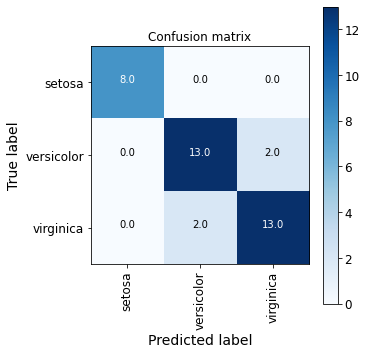

In [11]:
plot_confusion_matrix(confusion_mtx, class_names)

# Part C: Using SKLearn Libraries


In [12]:
# Importing the required libraries
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
 
# Loading the dataset
Data=df.values
X=Data[:,:-1]
y=Data[:,-1]

# Splitting training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 0)
 
# Creating the Nearest Centroid Classifier
model = NearestCentroid()
# Training the classifier

# model.fit(X_train, y_train.values.ravel())  ## This has changed
model.fit(X_train, y_train)  ## This has changed
y_predict= model.predict(X_test)





# Printing Accuracy on Training and Test sets
print(f"Training Set Score : {model.score(X_train, y_train) * 100} %")
print(f"Test Set Score : {model.score(X_test, y_test) * 100} %")
 
# Printing classification report of classifier on the test set set data
print(f"Model Classification Report : \n{classification_report(y_test,y_predict)}")

Training Set Score : 93.75 %
Test Set Score : 89.47368421052632 %
Model Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.83      0.94      0.88        16
         2.0       0.86      0.67      0.75         9

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38



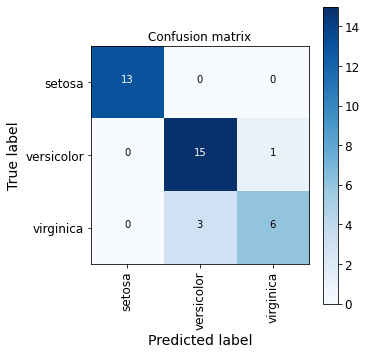

In [22]:
from sklearn.metrics import confusion_matrix

confusion_mtx1 = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(confusion_mtx1, class_names)

# ROC & AUC

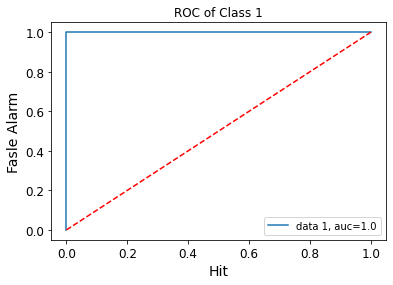

In [17]:
from sklearn import metrics
v=np.arange(0,1.05,0.1)
##Class1 ROC
yt=np.zeros(len(y_test))
yp=np.zeros(len(y_test))
yt
for i in range(len(y_test)):
    if y_test[i]==0:
        yt[i]=1
    else:
        yt[i]=0 
    if y_predict[i]==0:
        yp[i]=1
    else:
        yp[i]=0 
fpr, tpr, _ = metrics.roc_curve(yt,  yp)
auc = metrics.roc_auc_score(yt, yp)
plt.figure()
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(v,v,'r--')
plt.legend(loc=4)
plt.title('ROC of Class 1')
plt.xlabel('Hit')
plt.ylabel('Fasle Alarm')
plt.show()        

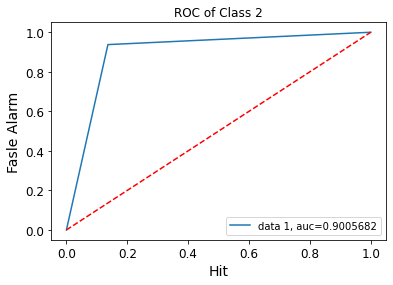

In [20]:
##Class1 ROC
yt=np.zeros(len(y_test))
yp=np.zeros(len(y_test))
yt
for i in range(len(y_test)):
    if y_test[i]==1:
        yt[i]=1
    else:
        yt[i]=0 
    if y_predict[i]==1:
        yp[i]=1
    else:
        yp[i]=0 
fpr, tpr, _ = metrics.roc_curve(yt,yp)
auc = metrics.roc_auc_score(yt, yp).astype("f")
plt.figure()
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(v,v,'r--')
plt.legend(loc=4)
plt.title('ROC of Class 2')
plt.xlabel('Hit')
plt.ylabel('Fasle Alarm')
plt.show()       

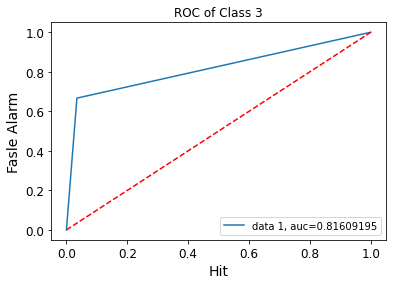

In [21]:
##Class1 ROC
yt=np.zeros(len(y_test))
yp=np.zeros(len(y_test))
yt
for i in range(len(y_test)):
    if y_test[i]==2:
        yt[i]=1
    else:
        yt[i]=0 
    if y_predict[i]==2:
        yp[i]=1
    else:
        yp[i]=0 
fpr, tpr, _ = metrics.roc_curve(yt,yp)
auc = metrics.roc_auc_score(yt, yp).astype("f")
plt.figure()
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(v,v,'r--')
plt.legend(loc=4)
plt.title('ROC of Class 3')
plt.xlabel('Hit')
plt.ylabel('Fasle Alarm')
plt.show()   